<a href="https://colab.research.google.com/github/toryn13/Rexamples/blob/main/western_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
download.file("https://raw.githubusercontent.com/toryn13/Rexamples/main/blot_quant.csv", "blot_quant")

In [ ]:
%%R
library(tidyverse)
blot_quant<-read_csv("/content/blot_quant")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 16 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Area
dbl (3): Wavelength, Intensity, Group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
blot_quant<-blot_quant%>%pivot_wider(names_from = Wavelength , values_from = Intensity )

In [ ]:
%%R
blot_quant

# A tibble: 8 × 4
  Area  Group `800` `700`
  <chr> <dbl> <dbl> <dbl>
1 Lane1     1 17900 38900
2 Lane2     1 16500 33700
3 Lane3     1 17900 29000
4 Lane4     1 16500 24600
5 Lane5     2 10800 32300
6 Lane6     2  7060 27800
7 Lane7     2  8020 30600
8 Lane8     2  6590 34200


In [ ]:
%%R
colnames(blot_quant)<-c("Area", "Group", "W800", "W700")

In [ ]:
%%R
blot_quant<-blot_quant%>%mutate(norm_ratio=W800/W700)
blot_quant

# A tibble: 8 × 5
  Area  Group  W800  W700 norm_ratio
  <chr> <dbl> <dbl> <dbl>      <dbl>
1 Lane1     1 17900 38900      0.460
2 Lane2     1 16500 33700      0.490
3 Lane3     1 17900 29000      0.617
4 Lane4     1 16500 24600      0.671
5 Lane5     2 10800 32300      0.334
6 Lane6     2  7060 27800      0.254
7 Lane7     2  8020 30600      0.262
8 Lane8     2  6590 34200      0.193


In [ ]:
%%R
blotmean<-blot_quant%>%group_by(Group)%>%summarise(mean_ratio=mean(norm_ratio), sd_ratio=sd(norm_ratio))

In [ ]:
%%R
blotmean

# A tibble: 2 × 3
  Group mean_ratio sd_ratio
  <dbl>      <dbl>    <dbl>
1     1      0.559   0.101 
2     2      0.261   0.0580


In [ ]:
%%R
t.test(norm_ratio~Group, data=blot_quant)


	Welch Two Sample t-test

data:  norm_ratio by Group
t = 5.1371, df = 4.7923, p-value = 0.004124
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 0.1472434 0.4500755
sample estimates:
mean in group 1 mean in group 2 
      0.5594354       0.2607759 



In [ ]:
%%R
blotmean$Group<-factor(blotmean$Group, levels=c("1", "2"))

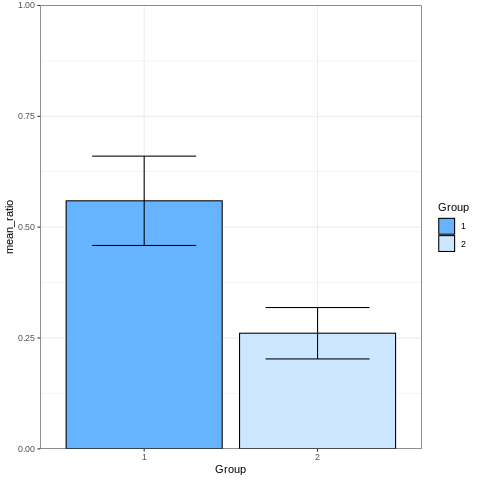

In [ ]:
%%R
p2<-blotmean%>%ggplot(aes(Group, mean_ratio, fill=Group))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = mean_ratio-sd_ratio, ymax = mean_ratio+sd_ratio),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 1), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_bw()
ylab("Ratio")
p2